# Identifiy Contours by Shape

In [1]:
import numpy as np
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

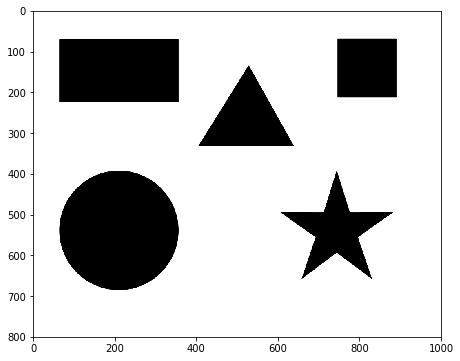

In [2]:
# Load and then gray scale image
image = cv2.imread('images/someshapes.jpg')
plt.figure(figsize=(10,6))
plt.imshow(image)
plt.show()

## Find the Contours:

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 1)

# Extract Contours
_,contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

## Approximating Contours:

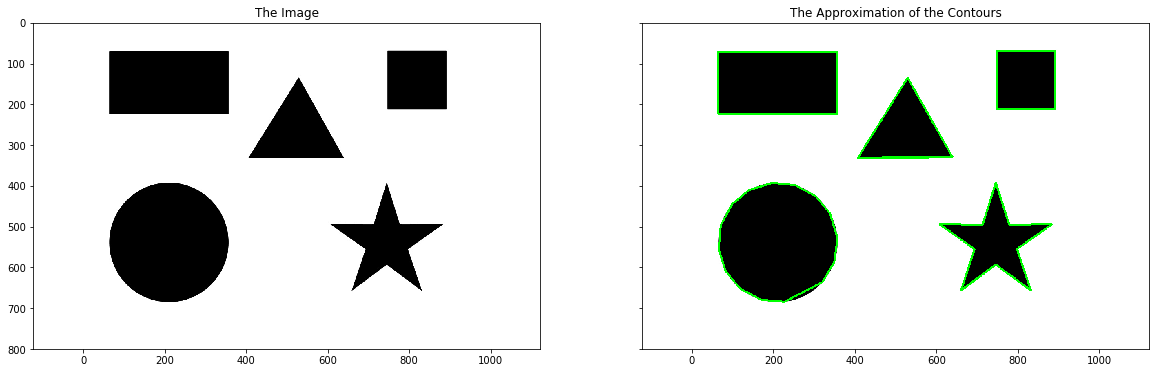

In [4]:
orig_image = image.copy()

for cnt in contours:
    # Get approximate polygons
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True),True)
    cv2.drawContours(orig_image, [approx], 0, (0, 255, 0), 4)

f, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(20,6))
ax[0].imshow(image)
ax[0].set_title("The Image")
ax[1].imshow(orig_image)
ax[1].set_title("The Approximation of the Contours")
plt.show()

We use the number of sides of the each Approximation to determine the shpae for example when a polygon 3 sides has then the shape is traingle.

In [5]:
orig_image = image.copy()

for cnt in contours:
    
    # Get approximate polygons
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True),True)
    
    if len(approx) == 3:
        shape_name = "Triangle"
        cv2.drawContours(orig_image,[cnt],0,(0,255,0),-1)
    
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(cnt)
        
        # Check to see if 4-side polygon is square or rectangle
        # cv2.boundingRect returns the top left and then width and 
        if abs(w-h) <= 3:
            shape_name = "Square"
            
            cv2.drawContours(orig_image, [cnt], 0, (0, 125 ,255), -1)

        else:
            shape_name = "Rectangle"
            cv2.drawContours(orig_image, [cnt], 0, (0, 0, 255), -1)
            
    elif len(approx) == 10:
        shape_name = "Star"
        cv2.drawContours(orig_image, [cnt], 0, (255, 255, 0), -1)                
        
    elif len(approx) >= 15:
        shape_name = "Circle"
        cv2.drawContours(orig_image, [cnt], 0, (0, 255, 255), -1)

    # Find contour center to place text at the center
    M = cv2.moments(cnt)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orig_image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

## Plot the Results:

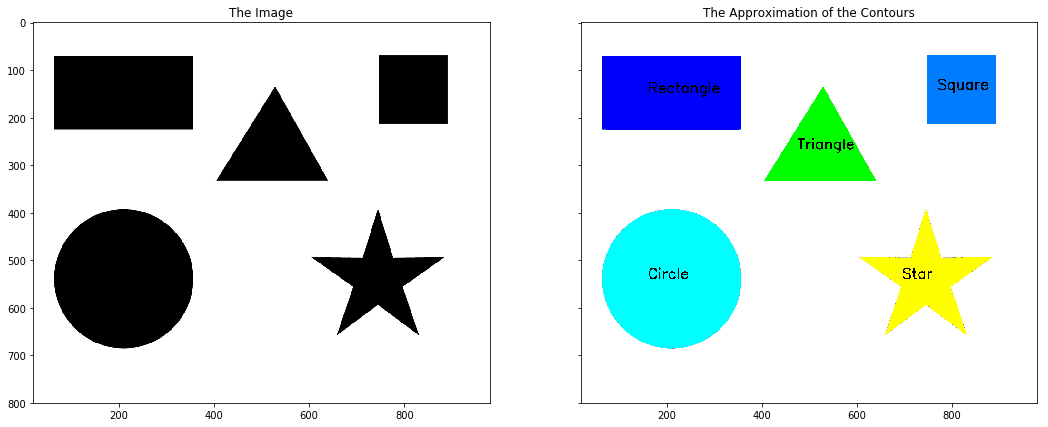

In [6]:
f, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(18,7))
ax[0].imshow(image)
ax[0].set_title("The Image")
ax[1].imshow(orig_image)
ax[1].set_title("The Approximation of the Contours")
plt.show()